In [1]:
# 모델 정의하기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(360, activation='relu'),
    Dense(128, activation='relu'),
    Dropout(0.2), # 이 층의 뉴런 20%를 가중치 업데이트 안함
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 360)               282600    
                                                                 
 dense_1 (Dense)             (None, 128)               46208     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 330098 (1.26 MB)
Trainable params: 330098 (1.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
from tensorflow.keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

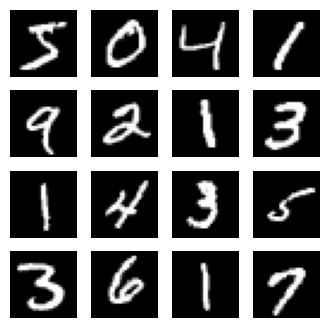

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(train_X[i,...], cmap='gray')
    plt.axis('off')
plt.show()

In [16]:
train_X = train_X / 255.0 # 화소는 0~255값을 가짐. 0~1사이로 표준화
test_X = test_X / 255.0
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [4]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD', metrics=['accuracy'])

In [5]:
model.fit(train_X, train_y, batch_size=100, epochs=5)

Epoch 1/5
600/600 [==============================] - 2s 3ms/step - loss: 1.0892 - accuracy: 0.7066
Epoch 2/5
600/600 [==============================] - 2s 3ms/step - loss: 0.4733 - accuracy: 0.8657
Epoch 3/5
600/600 [==============================] - 2s 4ms/step - loss: 0.3818 - accuracy: 0.8911
Epoch 4/5
600/600 [==============================] - 2s 3ms/step - loss: 0.3381 - accuracy: 0.9034
Epoch 5/5
600/600 [==============================] - 2s 3ms/step - loss: 0.3066 - accuracy: 0.9126


In [13]:
model.save('mnist_model.keras')

In [14]:
from tensorflow.keras.models import load_model
model2 = load_model('mnist_model.keras')

In [ ]:
model2.summary()

In [17]:
pred = model2.predict(test_X)

313/313 [==============================] - 0s 1ms/step


In [19]:
import numpy as np
print(np.argmax(pred, axis=1))

[7 2 1 ... 4 5 6]


In [21]:
json_str = model.to_json()

In [23]:
import json
json_dic = json.loads(json_str)
# print(json_dic)
with open("mnist_model.json", 'w') as f:
    json.dump(json_dic, f, indent=4)

In [25]:
# 저장한 모델 구조 불러오기
with open('mnist_model.json', 'r') as f:
    model_json = f.read()

In [ ]:
from tensorflow.keras.models import model_from_json
model3 = model_from_json(model_json)
model3.summary()

In [32]:
model3.compile(loss='sparse_categorical_crossentropy',
               optimizer='SGD', metrics=['accuracy'])

In [33]:
model3.fit(train_X, train_y, batch_size=100, epochs=3)

Epoch 1/3
600/600 [==============================] - 2s 3ms/step - loss: 1.0417 - accuracy: 0.7228
Epoch 2/3
600/600 [==============================] - 2s 3ms/step - loss: 0.4656 - accuracy: 0.8677
Epoch 3/3
600/600 [==============================] - 2s 3ms/step - loss: 0.3752 - accuracy: 0.8931


In [34]:
model3.evaluate(test_X, test_y)

313/313 [==============================] - 1s 1ms/step - loss: 0.2950 - accuracy: 0.9195


[0.2950461804866791, 0.9194999933242798]